In [1]:
import imageio
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy.io as sio

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [160]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 404A-07E2

 Directory of C:\Users\Admin\OneDrive\Documents\Code\ComputationalBiophysics

09/06/2018  09:07 AM    <DIR>          .
09/06/2018  09:07 AM    <DIR>          ..
09/04/2018  10:45 PM    <DIR>          .git
09/06/2018  09:06 AM    <DIR>          .ipynb_checkpoints
02/22/2018  02:58 PM               299 3dplot.py
04/06/2018  03:59 PM             2,609 cylinder_plot.m
09/03/2018  11:15 PM        79,385,428 cylinder_plot_with_Initial.gif
06/13/2018  08:46 PM         3,078,312 depolymerization_statistics.txt
09/01/2018  10:33 AM         1,692,667 diffusion_statistics.ipynb
08/18/2018  08:01 AM         9,867,943 diffusion_statistics.txt
04/06/2018  03:59 PM             3,876 fancy_plot.m
04/06/2018  03:59 PM                71 Feb
04/06/2018  03:59 PM               466 Filter.m
03/11/2018  01:21 PM         1,798,037 fragmentation_statistics.txt
04/06/2018  03:59 PM            26,872 ftsZ.jpg
09/06/2018  09:07 AM        64,327

In [189]:
big_table={}
filename='FtsZ_locations.txt'
file=open(filename,'r')
data=file.readline()
batch='0'
while data:
    datas=data.split()
    for index in range(0,len(datas),3):
        key=batch+'_'+datas[index]
#         print(key)
        if key in big_table:
            big_table[key].append((datas[index+1],datas[index+2]))
        else:
            big_table[key]=[]
            big_table[key].append((datas[index+1],datas[index+2]))
    data=file.readline()
file.close()

In [190]:
# big_table={}
filename='FtsZ_locations_1.txt'
file=open(filename,'r')
data=file.readline()
batch='1'
while data:
    datas=data.split()
    for index in range(0,len(datas),3):
        key=batch+'_'+datas[index]
#         print(key)
        if key in big_table:
            big_table[key].append((datas[index+1],datas[index+2]))
        else:
            big_table[key]=[]
            big_table[key].append((datas[index+1],datas[index+2]))
    data=file.readline()
file.close()

In [191]:
# big_table={}
filename='FtsZ_locations_2.txt'
file=open(filename,'r')
data=file.readline()
batch='2'
while data:
    datas=data.split()
    for index in range(0,len(datas),3):
        key=batch+'_'+datas[index]
#         print(key)
        if key in big_table:
            big_table[key].append((datas[index+1],datas[index+2]))
        else:
            big_table[key]=[]
            big_table[key].append((datas[index+1],datas[index+2]))
    data=file.readline()
file.close()

In [192]:
table_length={}
for key in list(big_table.keys()):
    table_length[key]=len(big_table[key])
    
sorted_table_ID=list(sorted(table_length,reverse=True,key=table_length.__getitem__))

## This part is for save matlab struct to experiment group

In [193]:
end_time=4
delta_time=100
FtsZ_location=[]
index=0
ID=sorted_table_ID[index]
while table_length[ID]>end_time*delta_time:
#     print(table_length[ID])
    FtsZ_location.append(big_table[ID])
    index+=1
    ID=sorted_table_ID[index]
# for ID in sorted_table_ID[0:1000]:
#     print(table_length[ID])
#     if table_length[ID]>end_time*100
#     FtsZ_location.append(big_table[ID])
index

6869

In [25]:
temp_data=np.array(FtsZ_location[0],dtype='float')

In [29]:
np.pi

3.141592653589793

In [39]:
y.shape

(6403,)

In [58]:
np.stack((x,y,z),axis=-1).tolist()

[[1185.0, 364.6857404134861, -308.18334467379543],
 [1185.0, 361.4385150093042, -311.9853571293514],
 [1180.0, 361.4385150093042, -311.9853571293514],
 [1185.0, 371.05986380934155, -300.47835307231844],
 [1185.0, 367.89297391659744, -304.34753644158474],
 [1185.0, 374.1860628065541, -296.5762188655549],
 [1190.0, 361.4385150093042, -311.9853571293514],
 [1185.0, 364.6857404134861, -308.18334467379543],
 [1185.0, 358.15165379890936, -315.75315687474307],
 [1185.0, 344.6151240869645, -330.4740223463654],
 [1185.0, 344.6151240869645, -330.4740223463654],
 [1185.0, 344.6151240869645, -330.4740223463654],
 [1185.0, 344.6151240869645, -330.4740223463654],
 [1185.0, 337.6186185589147, -337.6186185589148],
 [1185.0, 358.15165379890936, -315.75315687474307],
 [1185.0, 361.4385150093042, -311.9853571293514],
 [1185.0, 367.89297391659744, -304.34753644158474],
 [1185.0, 358.15165379890936, -315.75315687474307],
 [1185.0, 374.1860628065541, -296.5762188655549],
 [1185.0, 367.89297391659744, -304.3

In [75]:
np.arange(0,end_time,0.01).shape

(999,)

In [194]:
Matlab_save={}
R=600/2/np.pi*5
ID=0
for FtsZ in FtsZ_location:
    time=np.arange(0,len(FtsZ),1)/delta_time
    coordinates=np.array(FtsZ,dtype='float')
    ID=ID+1
    theta=2*np.pi*coordinates[:,0]/600
    y=R*np.cos(theta)
    z=R*np.sin(theta)
    x=coordinates[:,1]*5
    new_coordinates=np.stack((time,x,y,z),axis=-1).tolist()
    Matlab_save['FtsZ_'+str(ID)]=new_coordinates    

In [196]:
len(Matlab_save)

6869

In [91]:
Matlab_save['FtsZ_2']

[[0.0, 1550.0, 440.15723228874924, 185.02506332702066],
 [0.01, 1550.0, 440.15723228874924, 185.02506332702066],
 [0.02, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.03, 1550.0, 442.07064070768365, 180.40568677167028],
 [0.04, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.05, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.06, 1550.0, 440.15723228874924, 185.02506332702066],
 [0.07, 1550.0, 440.15723228874924, 185.02506332702066],
 [0.08, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.09, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.1, 1550.0, 436.18582596890286, 194.20244184635254],
 [0.11, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.12, 1550.0, 436.18582596890286, 194.20244184635254],
 [0.13, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.14, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.15, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.16, 1550.0, 438.19555566917313, 189.6241497991343],
 [0.17, 1550.0, 436.18582596890286, 194.202

In [64]:
sio.savemat('FtsZ.mat', {'Matlab_save':Matlab_save})

In [197]:
sio.savemat('FtsZ.mat', Matlab_save)

In [198]:
sio.whosmat('FtsZ.mat')

[('FtsZ_1', (12609, 4), 'double'),
 ('FtsZ_2', (11812, 4), 'double'),
 ('FtsZ_3', (11721, 4), 'double'),
 ('FtsZ_4', (11659, 4), 'double'),
 ('FtsZ_5', (10507, 4), 'double'),
 ('FtsZ_6', (10437, 4), 'double'),
 ('FtsZ_7', (10422, 4), 'double'),
 ('FtsZ_8', (8956, 4), 'double'),
 ('FtsZ_9', (8569, 4), 'double'),
 ('FtsZ_10', (8534, 4), 'double'),
 ('FtsZ_11', (8441, 4), 'double'),
 ('FtsZ_12', (8237, 4), 'double'),
 ('FtsZ_13', (8237, 4), 'double'),
 ('FtsZ_14', (8237, 4), 'double'),
 ('FtsZ_15', (8189, 4), 'double'),
 ('FtsZ_16', (8006, 4), 'double'),
 ('FtsZ_17', (7910, 4), 'double'),
 ('FtsZ_18', (7875, 4), 'double'),
 ('FtsZ_19', (7847, 4), 'double'),
 ('FtsZ_20', (7841, 4), 'double'),
 ('FtsZ_21', (7841, 4), 'double'),
 ('FtsZ_22', (7831, 4), 'double'),
 ('FtsZ_23', (7830, 4), 'double'),
 ('FtsZ_24', (7817, 4), 'double'),
 ('FtsZ_25', (7794, 4), 'double'),
 ('FtsZ_26', (7794, 4), 'double'),
 ('FtsZ_27', (7706, 4), 'double'),
 ('FtsZ_28', (7568, 4), 'double'),
 ('FtsZ_29', (7568, 4)

## save matlab struct ended

In [168]:
end_time=5
delta_time=100
FtsZ_location=[]
index=0
ID=sorted_table_ID[index]
while table_length[ID]>end_time*delta_time:
#     print(table_length[ID])
    FtsZ_location.append(big_table[ID])
    index+=1
    ID=sorted_table_ID[index]
# for ID in sorted_table_ID[0:1000]:
#     print(table_length[ID])
#     if table_length[ID]>end_time*100
#     FtsZ_location.append(big_table[ID])
index

2284

In [ ]:
sorted_table_ID

In [10]:

# for index,FtsZ in enumerate(FtsZ_location):
#     image=np.ones((600,563))
#     for location in FtsZ:
#         image[int(location[0])][int(location[1])]=0
#     imageio.imwrite('test'+str(index)+'.jpg',image)

In [87]:
len(FtsZ_location)

24

In [124]:

# distances_aggr=[]
# distances=[0]*end_time
# error_bar=[0]*end_time
# for i in range(1,end_time):
#     distance_sum=[]
# #     counter=0
#     for j in range(0,end_time,i):
              
        
#         for FtsZ in FtsZ_location:
#             if j*delta_time+i*delta_time<end_time*delta_time:
#                 initial=FtsZ[j*delta_time]
#                 final=FtsZ[j*delta_time+i*delta_time]
#                 distance=((int(final[0])-int(initial[0]))*5*10**(-3))**2+((int(final[1])-int(initial[1]))*5*10**(-3))**2
#                 if distance<=i*0.2:
#                     distance_sum.append(distance)
# #                 counter+=1
#     print(np.max(distance_sum))
# #     print(np.mean(distance_sum))
# #     if np.max(distance_sum)
#     distances_aggr.append(distance_sum)
#     distances[i]=np.mean(distance_sum)
#     error_bar[i]=np.std(distance_sum)
# #     distances[i]=np.mean(distance_sum)
# #     error_bar[i]=np.std(distance_sum)
# # distances=np.array(distances,dtype='float')
# # error_bar=np.array(error_bar,dtype='float')


0.09462499999999999
0.18850000000000003
0.22652500000000003


TypeError: unsupported operand type(s) for /: 'range' and 'int'

In [98]:
delta_time/sample_interval

10.0

In [166]:
end_time=5
delta_time=100
FtsZ_location=[]
index=0
ID=sorted_table_ID[index]
while table_length[ID]>end_time*delta_time:
#     print(table_length[ID])
    FtsZ_location.append(big_table[ID])
    index+=1
    ID=sorted_table_ID[index]
# for ID in sorted_table_ID[0:1000]:
#     print(table_length[ID])
#     if table_length[ID]>end_time*100
#     FtsZ_location.append(big_table[ID])

sample_interval=10
distances_aggr=[]
distances=[0]*end_time*int(delta_time/sample_interval)
error_bar=[0]*end_time*int(delta_time/sample_interval)
median=[0]*end_time*int(delta_time/sample_interval)
for i in range(1,end_time*int(delta_time/sample_interval)):
    distance_sum=[]
#     counter=0
    for j in range(0,end_time*int(delta_time/sample_interval),i):
              
        
        for FtsZ in FtsZ_location:
            if j*sample_interval+i*sample_interval<end_time*delta_time:
                initial=FtsZ[j*sample_interval]
                final=FtsZ[j*sample_interval+i*sample_interval]
                distance=((int(final[0])-int(initial[0]))*5*10**(-3))**2+((int(final[1])-int(initial[1]))*5*10**(-3))**2
                if distance<=6:
                    distance_sum.append(distance)
#                 counter+=1
#     print(np.max(distance_sum))
#     print(np.mean(distance_sum))
#     if np.max(distance_sum)
    distances_aggr.append(distance_sum)
    distances[i]=np.mean(distance_sum)
    error_bar[i]=np.std(distance_sum)
    median[i]=np.median(distance_sum)
#     distances[i]=np.mean(distance_sum)
#     error_bar[i]=np.std(distance_sum)
# distances=np.array(distances,dtype='float')
# error_bar=np.array(error_bar,dtype='float')


(array([321., 353., 118., 210.,  71.,  18.,   0.,   0.,   3.,   1.]),
 array([1.00000e-04, 5.56150e-02, 1.11130e-01, 1.66645e-01, 2.22160e-01,
        2.77675e-01, 3.33190e-01, 3.88705e-01, 4.44220e-01, 4.99735e-01,
        5.55250e-01]),
 <a list of 10 Patch objects>)

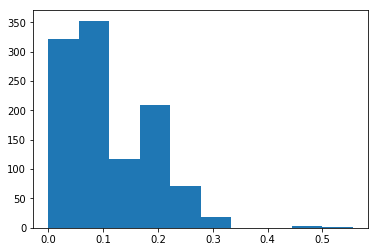

In [146]:
plt.hist(distances_aggr[-1])

In [33]:
distances_aggr_np=np.array(distances_aggr[0])

In [40]:
distances_aggr_np.size

22135

In [30]:
distances_aggr_np>1

array([False, False, False, ..., False, False, False])

In [41]:
distances_aggr_np[distances_aggr_np>1].size

751

In [13]:
len(distances_aggr[0])

1512

In [15]:
np.argmax(distances_aggr[0])

935

In [160]:
len(FtsZ_location)

490

In [151]:
len(distances[1])

6860

In [152]:
len(distances[10])

980

In [158]:
np.max(distances[1])

8.850650000000002

In [159]:
np.max(distances[28])

7.7562500000000005

ValueError: the number of data points must exceed order + 2 for Bayesian estimate the covariance matrix

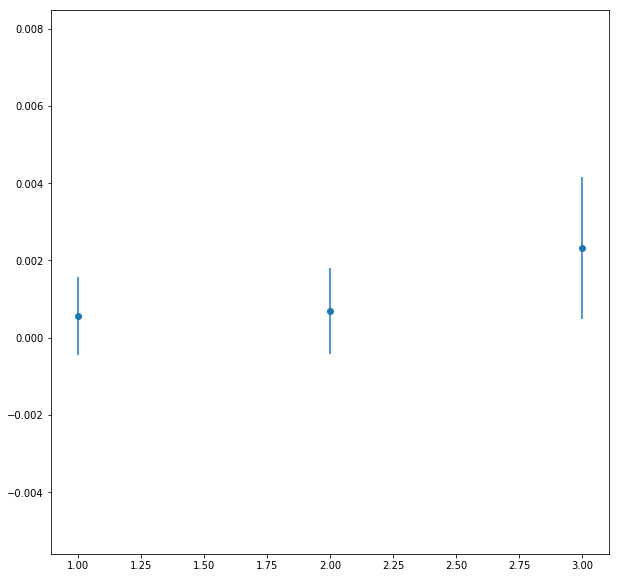

In [86]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
plt.scatter(range(1,end_time),distances[1:end_time],label='Simulation Data')
plt.errorbar(range(1,end_time),distances[1:end_time],yerr=error_bar[1:end_time],fmt='none',label='Error Bar')
(m, b),V= np.polyfit(range(1,end_time),distances[1:end_time],1,cov=True)
plt.plot(range(1,end_time), b + m * np.floor(range(1,end_time)), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.title('Diffusion Constant D='+str(round(m/2,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
plt.legend()
# ax.annotate(,xy=(15,3),xytext=(15,3))

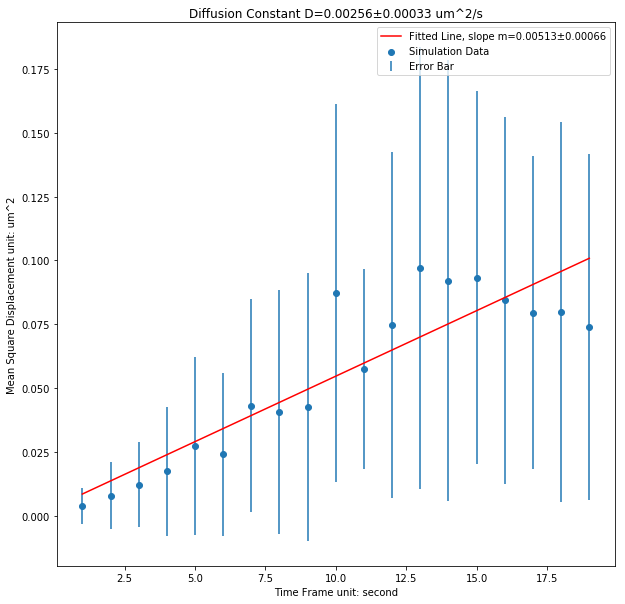

In [92]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
plt.scatter(range(1,end_time),distances[1:end_time],label='Simulation Data')
plt.errorbar(range(1,end_time),distances[1:end_time],yerr=error_bar[1:end_time],fmt='none',label='Error Bar')
(m, b),V= np.polyfit(range(1,end_time),distances[1:end_time],1,cov=True)
plt.plot(range(1,end_time), b + m * np.floor(range(1,end_time)), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.title('Diffusion Constant D='+str(round(m/2,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
plt.legend()

# ax.annotate(,xy=(15,3),xytext=(15,3))

In [112]:
len(x_axis)

199

In [ ]:
labels=[]
for i in range(0,end_time*int(delta_time/sample_interval)):
    labels.append(str(i))
x_axis=np.array(range(1,end_time*int(delta_time/sample_interval)))/10
fig=plt.figure(figsize=[10,10])
plt.boxplot(distances_aggr,showfliers=False)
(m, b),V= np.polyfit(range(1,end_time),distances[1:end_time],1,cov=True)
plt.plot(range(1,end_time), b + m * np.floor(range(1,end_time)), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))

plt.xticks(range(1,end_time,3),labels[1:end_time:3])
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.legend()
plt.title('Diffusion Constant D='+str(round(m/4,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
# plt.show()
plt.savefig("MSD_Boxplot.pdf", transparent=True)

In [119]:
end_time*int(delta_time/sample_interval)

200

In [121]:
len(distances_aggr)

199

In [177]:
len(FtsZ_location[0])

6403

In [114]:
len(error_bar)

100

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


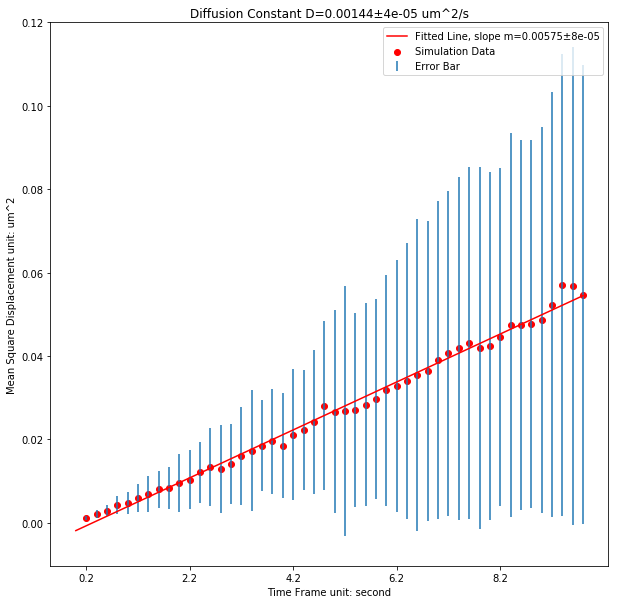

In [116]:
end_time=10
cap_time=100
delta_time=100
FtsZ_location=[]
index=0
ID=sorted_table_ID[index]
while table_length[ID]>end_time*delta_time:
#     print(table_length[ID])
    FtsZ_location.append(big_table[ID])
    index+=1
    ID=sorted_table_ID[index]
# for ID in sorted_table_ID[0:1000]:
#     print(table_length[ID])
#     if table_length[ID]>end_time*100
#     FtsZ_location.append(big_table[ID])

sample_interval=20
distances_aggr=[]
distances=[]
error_bar=[]
median=[]
for i in range(0,end_time*int(delta_time/sample_interval)):
    distances.append([])
    error_bar.append([])
    median.append([])
    distances_aggr.append([])
for FtsZ in FtsZ_location:
    for i in range(1,end_time*int(delta_time/sample_interval)):
        distance_sum=[]
    #     counter=0
        for j in range(0,int(len(FtsZ)/sample_interval),i):
                              
            if j*sample_interval+i*sample_interval<cap_time*delta_time and j*sample_interval+i*sample_interval<len(FtsZ):
                initial=FtsZ[j*sample_interval]
                final=FtsZ[j*sample_interval+i*sample_interval]
                distance=((int(final[0])-int(initial[0]))*5*10**(-3))**2+((int(final[1])-int(initial[1]))*5*10**(-3))**2
                if distance<=3:#i/100*0.5:
                    distance_sum.append(distance)
#                 counter+=1
#     print(np.max(distance_sum))
#     print(np.mean(distance_sum))
#     if np.max(distance_sum)
        if distance_sum!=[]:
    #         distances_aggr.append(distance_sum)
            distances[i].append(np.mean(distance_sum))
            error_bar[i].append(np.std(distance_sum))
            median[i].append(np.median(distance_sum))
            distances_aggr[i].extend(distance_sum)
#     distances[i]=np.mean(distance_sum)
#     error_bar[i]=np.std(distance_sum)
# distances=np.array(distances,dtype='float')
# error_bar=np.array(error_bar,dtype='float')
error_bar[0]=[1]
distances[0]=[1]
for i in range(0,end_time*int(delta_time/sample_interval)):
#     error_bar[i]=np.std(distances_aggr[i])
#     distances[i]=np.mean(distances_aggr[i])
    median[i]=np.median(distances_aggr[i])
    error_bar[i]=np.std(distances[i])
    distances[i]=np.mean(distances[i])
    

labels=[]
for i in range(0,end_time*int(delta_time/sample_interval)):
    labels.append(str(i/(delta_time/sample_interval)))
x_axis=np.array(range(0,end_time*int(delta_time/sample_interval)))/(delta_time/sample_interval)
fig=plt.figure(figsize=[10,10])
# box=plt.boxplot(distances_aggr,showfliers=False)
plt.scatter(x_axis[1:end_time*int(delta_time/sample_interval)]*delta_time/sample_interval,distances[1:end_time*int(delta_time/sample_interval)],label='Simulation Data',c='r')
plt.errorbar(x_axis[1:end_time*int(delta_time/sample_interval)]*delta_time/sample_interval,distances[1:end_time*int(delta_time/sample_interval)],yerr=error_bar[1:end_time*int(delta_time/sample_interval)],fmt='none',label='Error Bar')
(m, b),V= np.polyfit(x_axis[1:end_time*int(delta_time/sample_interval)],distances[1:end_time*int(delta_time/sample_interval)],1,cov=True)
plt.plot(x_axis*delta_time/sample_interval, b + m *(x_axis), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))

plt.xticks(x_axis[1:end_time*int(delta_time/sample_interval):10]*delta_time/sample_interval,labels[1:end_time*int(delta_time/sample_interval):10])
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.legend()
plt.title('Diffusion Constant D='+str(round(m/4,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
# plt.show()
plt.savefig("MSD_Boxplot.pdf", transparent=True)

# 3D FtsZ tracking

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


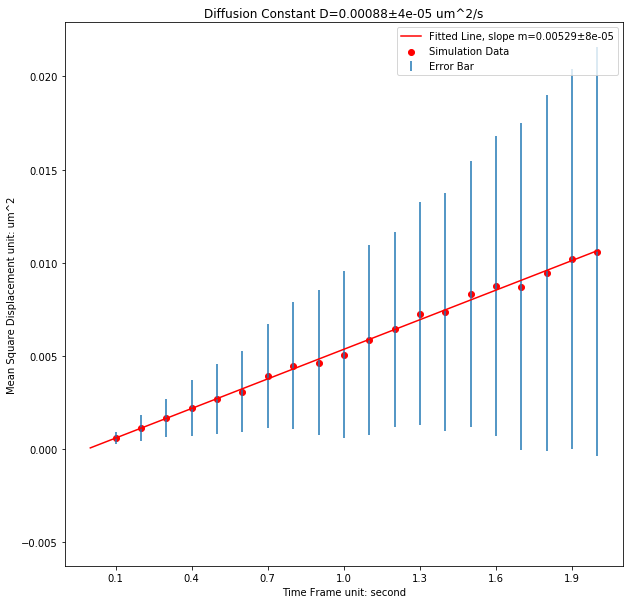

In [149]:
end_time=2.1
cap_time=100
delta_time=100
FtsZ_location=[]
index=0
ID=sorted_table_ID[index]
while table_length[ID]>end_time*delta_time:
#     print(table_length[ID])
    FtsZ_location.append(big_table[ID])
    index+=1
    ID=sorted_table_ID[index]
# for ID in sorted_table_ID[0:1000]:
#     print(table_length[ID])
#     if table_length[ID]>end_time*100
#     FtsZ_location.append(big_table[ID])
D3_coordinates=[]
for FtsZ in FtsZ_location:
    time=np.arange(0,len(FtsZ),1)/delta_time
    coordinates=np.array(FtsZ,dtype='float')
#     ID=ID+1
    theta=2*np.pi*coordinates[:,0]/600
    y=R*np.cos(theta)
    z=R*np.sin(theta)
    x=coordinates[:,1]*5
    new_coordinates=np.stack((time,x,y,z),axis=-1).tolist()
    D3_coordinates.append(new_coordinates)    

sample_interval=10
distances_aggr=[]
distances=[]
error_bar=[]
median=[]
for i in range(0,int(end_time*delta_time/sample_interval)):
    distances.append([])
    error_bar.append([])
    median.append([])
    distances_aggr.append([])
for FtsZ in D3_coordinates:
    for i in range(1,int(end_time*delta_time/sample_interval)):
        distance_sum=[]
    #     counter=0
        for j in range(0,int(len(FtsZ)/sample_interval),i):
                              
            if j*sample_interval+i*sample_interval<cap_time*delta_time and j*sample_interval+i*sample_interval<len(FtsZ):
                initial=FtsZ[j*sample_interval]
                final=FtsZ[j*sample_interval+i*sample_interval]
                distance=((int(final[1])-int(initial[1]))*10**(-3))**2+((int(final[2])-int(initial[2]))*10**(-3))**2+((int(final[3])-int(initial[3]))*10**(-3))**2
#                 if distance<=3:#i/100*0.5:
                distance_sum.append(distance)
#                 counter+=1
#     print(np.max(distance_sum))
#     print(np.mean(distance_sum))
#     if np.max(distance_sum)
        if distance_sum!=[]:
    #         distances_aggr.append(distance_sum)
            distances[i].append(np.mean(distance_sum))
            error_bar[i].append(np.std(distance_sum))
            median[i].append(np.median(distance_sum))
            distances_aggr[i].extend(distance_sum)
#     distances[i]=np.mean(distance_sum)
#     error_bar[i]=np.std(distance_sum)
# distances=np.array(distances,dtype='float')
# error_bar=np.array(error_bar,dtype='float')
error_bar[0]=[1]
distances[0]=[1]
for i in range(0,int(end_time*delta_time/sample_interval)):
#     error_bar[i]=np.std(distances_aggr[i])
#     distances[i]=np.mean(distances_aggr[i])
    median[i]=np.median(distances_aggr[i])
    error_bar[i]=np.std(distances[i])
    distances[i]=np.mean(distances[i])
#     distances[i]=np.mean(distances_aggr[i])
    

labels=[]
for i in range(0,int(end_time*delta_time/sample_interval)):
    labels.append(str(i/(delta_time/sample_interval)))
x_axis=np.array(range(0,int(end_time*delta_time/sample_interval)))/(delta_time/sample_interval)
fig=plt.figure(figsize=[10,10])
# box=plt.boxplot(distances_aggr,showfliers=False)
plt.scatter(x_axis[1:int(end_time*delta_time/sample_interval)]*delta_time/sample_interval,distances[1:int(end_time*delta_time/sample_interval)],label='Simulation Data',c='r')
plt.errorbar(x_axis[1:int(end_time*delta_time/sample_interval)]*delta_time/sample_interval,distances[1:int(end_time*delta_time/sample_interval)],yerr=error_bar[1:int(end_time*delta_time/sample_interval)],fmt='none',label='Error Bar')
(m, b),V= np.polyfit(x_axis[1:int(end_time*delta_time/sample_interval)],distances[1:int(end_time*delta_time/sample_interval)],1,cov=True)
plt.plot(x_axis*delta_time/sample_interval, b + m *(x_axis), '-',color='red',label='Fitted Line, slope m='+str(round(m,5))+'±'+str(round(np.sqrt(V[0][0]),5)))

plt.xticks(x_axis[1:int(end_time*delta_time/sample_interval):3]*delta_time/sample_interval,labels[1:int(end_time*delta_time/sample_interval):3])
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit: um^2')
plt.legend()
plt.title('Diffusion Constant D='+str(round(m/6,5))+'±'+str(round(np.sqrt(V[0][0])/2,5))+' um^2/s')
# plt.show()
plt.savefig("MSD_Boxplot.pdf", transparent=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


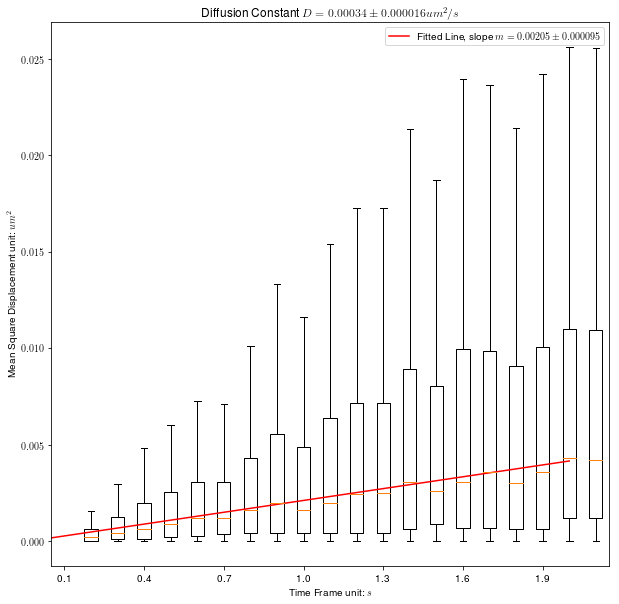

In [188]:
fig=plt.figure(figsize=[10,10])
box=plt.boxplot(distances_aggr,showfliers=False)
# plt.scatter(x_axis[1:int(end_time*delta_time/sample_interval)]*delta_time/sample_interval,distances[1:int(end_time*delta_time/sample_interval)],label='Simulation Data',c='r')
# plt.errorbar(x_axis[1:int(end_time*delta_time/sample_interval)]*delta_time/sample_interval,distances[1:int(end_time*delta_time/sample_interval)],yerr=error_bar[1:int(end_time*delta_time/sample_interval)],fmt='none',label='Error Bar')
(m, b),V= np.polyfit(x_axis[1:int(end_time*delta_time/sample_interval)],median[1:int(end_time*delta_time/sample_interval)],1,cov=True)
plt.plot(x_axis*delta_time/sample_interval, b + m *(x_axis), '-',color='red',label='Fitted Line, slope $m='+str(round(m,5))+'±'+'{:f}'.format(round(np.sqrt(V[0][0]),7))+'$')

plt.xticks(x_axis[1:int(end_time*delta_time/sample_interval):3]*delta_time/sample_interval,labels[1:int(end_time*delta_time/sample_interval):3])
plt.xlabel('Time Frame unit: $s$')
plt.ylabel('Mean Square Displacement unit: $um^2$')
plt.legend()
plt.title('Diffusion Constant $D='+str(round(m/6,5))+'±'+'{:f}'.format(round(np.sqrt(V[0][0])/6,7))+' um^2/s$')
# plt.show()
plt.savefig('MSD_Boxplot.pdf', transparent=True)

In [177]:
'{:f}'.format(round(np.sqrt(V[0][0])/6,7))

'0.000013'

In [130]:
len(FtsZ_location)

1607

In [131]:
len(D3_coordinates)

1607

In [125]:
len(D3_coordinates)

19643

In [118]:
len(distances_aggr)

50

In [105]:
distances

[1.0,
 0.0010129145041246458,
 0.0020046218115198603,
 0.002714974467275855,
 0.003915152527896715,
 0.004390429943148085,
 0.005435055809565152,
 0.006054582512081052,
 0.0072987714611085905,
 0.007581149047371161,
 0.008666037271361822,
 0.009172726792894693,
 0.010869541144572344,
 0.011910482831979312,
 0.011380897270618997,
 0.013196304302134037,
 0.014799501228420582,
 0.014502931608858287,
 0.017026167106654087,
 0.019119809247206056,
 0.016319104664569952,
 0.01854174607595894,
 0.018267870662934407,
 0.020741371175977477,
 0.024035988199455096,
 0.02263166609171611,
 0.021844859938646093,
 0.022237947446036476,
 0.025605160230772032,
 0.02657593965128106,
 0.02919071572068169,
 0.027479433397187756,
 0.028745533751536784,
 0.02812891470539417,
 0.03071442410576356,
 0.03332633870714178,
 0.034569122252185336,
 0.03807623981691625,
 0.03929692724076553,
 0.03263797478636142,
 0.03408401600511684,
 0.037025166687920705,
 0.03761362514495853,
 0.03881629150498615,
 0.039374510976

In [11]:
len(distances_aggr)

100

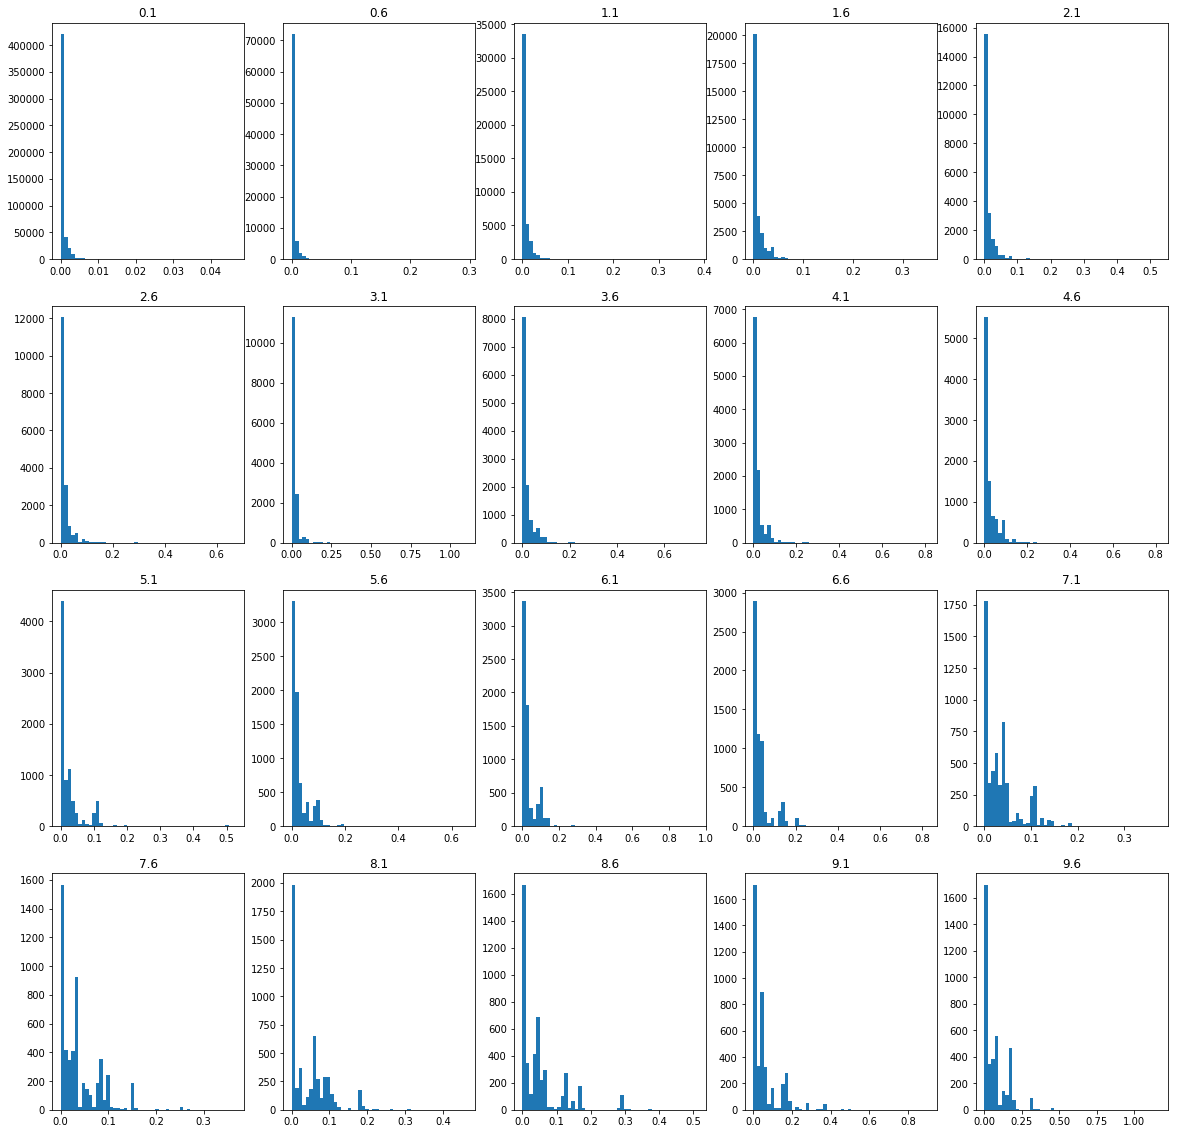

In [8]:
plt.figure(figsize=[20,20])
for i in range(20):
    
    plt.subplot(4,5,i+1)
    plt.hist(distances_aggr[i*5+1],bins=50)
    plt.title(labels[i*5+1])

(array([4.21167e+05, 4.09510e+04, 2.04930e+04, 8.93100e+03, 2.18100e+03,
        9.99000e+02, 1.56900e+03, 4.22000e+02, 2.83000e+02, 1.04000e+02,
        4.30000e+01, 1.05000e+02, 1.50000e+01, 2.30000e+01, 3.50000e+01,
        1.40000e+01, 8.00000e+00, 8.00000e+00, 1.50000e+01, 1.40000e+01,
        1.00000e+01, 4.00000e+00, 1.00000e+00, 6.00000e+00, 1.00000e+00,
        4.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([0.      , 0.000932, 0.001864, 0.002796, 0.003728, 0.00466 ,
        0.005592, 0.006524, 0.007456, 0.008388, 0.00932 , 0.010252,
        0.011184, 0.012116, 0.013048, 0.01398 , 0.014912, 0.015844,
        0.016776, 0.017708, 0.01864 , 0.019572, 0.020504, 0.0214

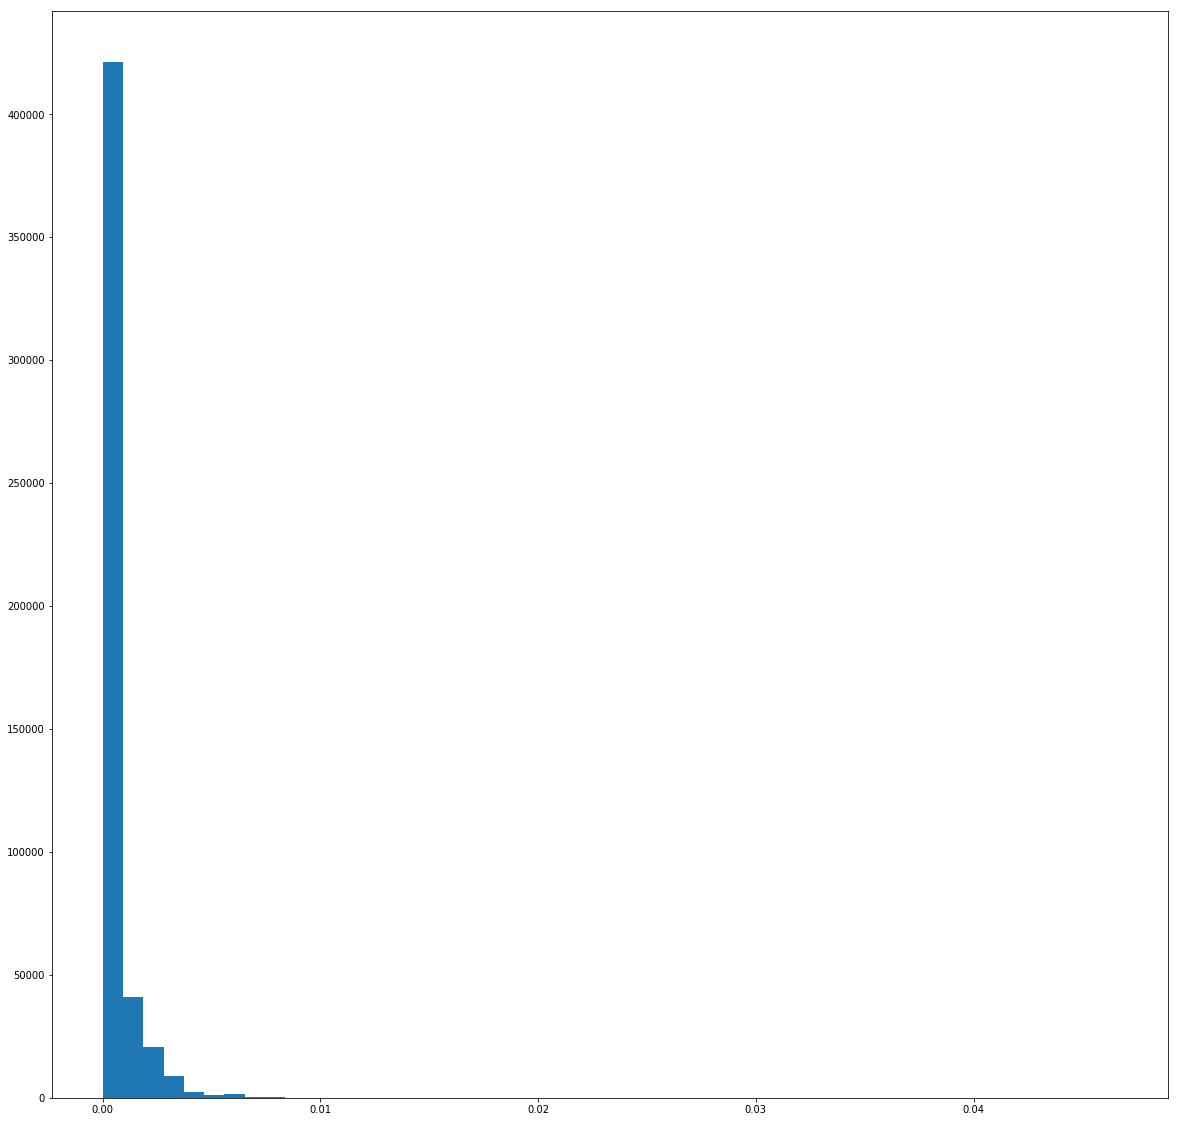

In [9]:
plt.figure(figsize=[20,20])
plt.hist(distances_aggr[1],bins=50)

In [23]:
i*30+j*10

100

In [25]:
j

1

In [252]:
labels[1:100:10]

['0.2', '1.2', '2.2', '3.2', '4.2', '5.2', '6.2', '7.2', '8.2', '9.2']

In [241]:
len(distances_aggr)

100

(array([2.81e+03, 4.30e+02, 5.58e+02, 9.00e+00, 2.00e+00, 1.70e+01,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([0.    , 0.0901, 0.1802, 0.2703, 0.3604, 0.4505, 0.5406, 0.6307,
        0.7208, 0.8109, 0.901 ]),
 <a list of 10 Patch objects>)

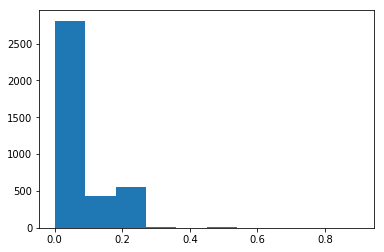

In [246]:
plt.hist(distances_aggr[-1])

In [114]:
x_axis

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [220]:
b

-0.0017542857541425472

In [135]:
np.sqrt(V[0][0])

0.003503152083577627

In [58]:
len(error_bar)

64

In [60]:
len(distances)

64

In [101]:
m/2

0.004950591629096862

In [61]:
velocity=velocity/64.03

In [63]:
velocity=velocity*5*10**(-9)

In [67]:
velocity

array([7.89658649e-09, 7.89658649e-09, 1.99920020e-08, 1.28074492e-08,
       1.28074492e-08, 1.28074492e-08, 1.09368367e-08, 1.38236313e-08,
       1.28848220e-08, 1.31971700e-08, 1.28848220e-08, 1.28848220e-08,
       1.22601269e-08, 1.49167233e-08, 1.61015546e-08, 1.61015546e-08,
       1.48376172e-08, 1.48376172e-08, 1.46033652e-08, 1.47589134e-08,
       1.47336891e-08, 1.47336891e-08, 1.47336891e-08, 3.99840040e-08])